In [53]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy import signal
from scipy.io import wavfile
from IPython.display import Audio

Setting parameters for spectrogram creation

In [54]:
file_path = "sample/audio/filepath"

load_sample_rate = 16000

# Second method parameters
fft_size = 2048
window_size = fft_size
hop_size = window_size


Loading data and extracting random five second timespan of it, so that the differences are more easily visible and output spectrograms are similar to those used in final pipeline

In [55]:
data, sample_rate = librosa.load(file_path, sr = load_sample_rate)

start_time = 10
end_time = 15

start_sample = int(start_time * sample_rate)
end_sample = int(end_time * sample_rate)

data = data[start_sample:end_sample]

Audio(data = data, rate = sample_rate)

**Regular spectrogram creation method**

In [56]:
frequencies, times, spectrogram1 = signal.spectrogram(data, sample_rate)

**Parameterized spectrogram with dB scale**

In [57]:
stft = librosa.stft(
        data,
        n_fft = fft_size,
        hop_length = hop_size,
        win_length = window_size,
        center = False
    )
spectrogram2 = np.abs(stft)
spectrogram2_db = librosa.amplitude_to_db(spectrogram2, ref = np.max)


**Mel spectrogram**

In [58]:
mel_spectrogram = librosa.feature.melspectrogram(y = data, sr = sample_rate)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref = np.max)

Ploting spectrograms

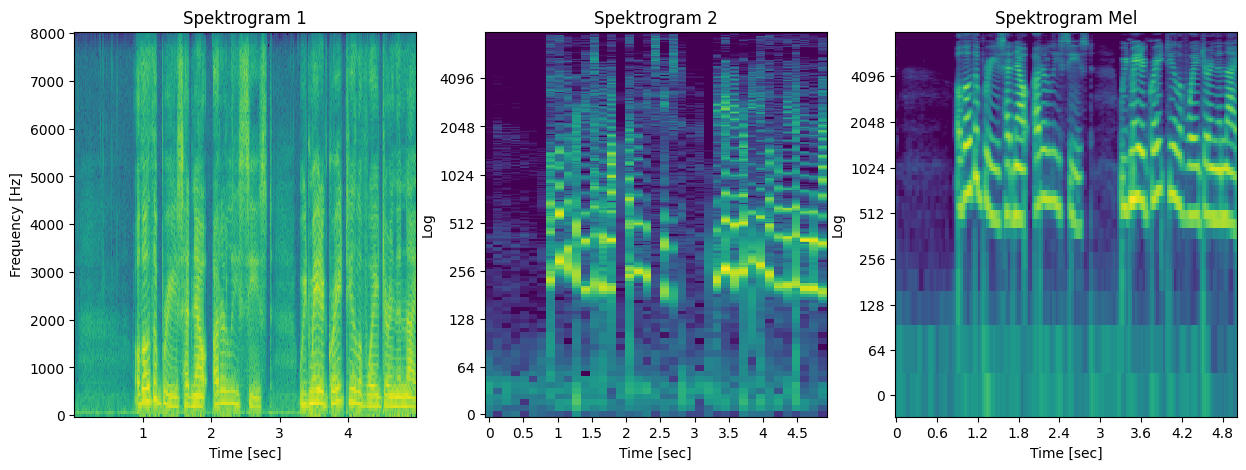

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

im1 = axes[0].pcolormesh(times, frequencies, np.log(spectrogram1), cmap='viridis')
axes[0].set_title("Spektrogram 1")
axes[0].set_xlabel("Time [sec]")
axes[0].set_ylabel("Frequency [Hz]")

librosa.display.specshow(spectrogram2_db, ax = axes[1], y_axis = "log", x_axis = "time", sr = sample_rate, hop_length = hop_size, win_length = window_size, n_fft = fft_size, cmap = 'viridis')
axes[1].set_title("Spektrogram 2")
axes[1].set_xlabel("Time [sec]")
axes[1].set_ylabel("Log")

librosa.display.specshow(mel_spectrogram_db, ax = axes[2], y_axis = "log", x_axis = "time", sr = sample_rate, cmap='viridis')
axes[2].set_title("Spektrogram Mel")
axes[2].set_xlabel("Time [sec]")
axes[2].set_ylabel("Log")

plt.show()

> [!NOTE]
> Spectrograms used in final pipeline are in grayscale but for a better visual output in this notebook we chose a map called virdis